In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import asyncio
import aiohttp
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
from ast import literal_eval
from collections import defaultdict
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
expts = pd.read_excel('/Users/hitz/encode-prod/experiment_report_2019_11_28_2h_1m.xls')


In [3]:
expts['Date released'] = expts['Date released'].apply(lambda x: pd.to_datetime(x))

In [4]:
expts.dtypes

ID                                                 object
Accession                                          object
Assay name                                         object
Assay title                                        object
Target of assay                                    object
Target gene symbol                                 object
Biosample summary                                  object
Biosample term name                                object
Lab                                                object
Project                                            object
Status                                             object
Related series                                     object
Biosample accession                                object
Biological replicate                               object
Technical replicate                                object
Linked antibody                                    object
Organism                                           object
Life stage    

## Distributions of metrics

In [5]:
cols = expts['Assay type'].unique()
sns.set(style="darkgrid", font="Arial")
fig, ax = plt.subplots(figsize=(15,8))
(
    expts.groupby(['Assay type', 'Date released'])
         .count()
         .unstack('Assay type')['Accession'][cols]
         .resample('M').sum()
         .cumsum()
         .fillna(method='ffill')
         .plot(colormap='Spectral',lw=3, ax=ax)
)
#fig.set_facecolor((0.4,0.4,0.4,1))
fig.patches.append(
    patches.Rectangle(
        (0,1),
        1,
        0.05,
        color='black',#'#CCCCCC',
        transform=ax.transAxes,
        zorder=-1
    )
)
fig.suptitle('ENCODE EXPERIMENTS THROUGH THE AGES',
              size=16,
              family='Arial',
              fontweight='bold',
              color='white',
              y=0.902);

KeyError: 'Assay type'

In [6]:
cols = expts['Assay type'].unique()
sns.set(style="darkgrid", font="Arial")
fig, ax = plt.subplots(figsize=(15,8))
(
    expts.groupby(['Assay type', 'Date released'])
         .count()
         .unstack('Assay type')['Accession'][cols]
         .resample('M').sum()
         .cumsum()
         .fillna(method='ffill')
         .plot(colormap='Spectral',lw=3, ax=ax,logy=True)
)
#fig.set_facecolor((0.4,0.4,0.4,1))
fig.patches.append(
    patches.Rectangle(
        (0,1),
        1,
        0.05,
        color='black',#'#CCCCCC',
        transform=ax.transAxes,
        zorder=-1
    )
)
fig.suptitle('ENCODE EXPERIMENTS THROUGH THE AGES',
              size=16,
              family='Arial',
              fontweight='bold',
              color='white',
              y=0.902);

KeyError: 'Assay type'

In [7]:
expts['Assay type'].unique()

KeyError: 'Assay type'

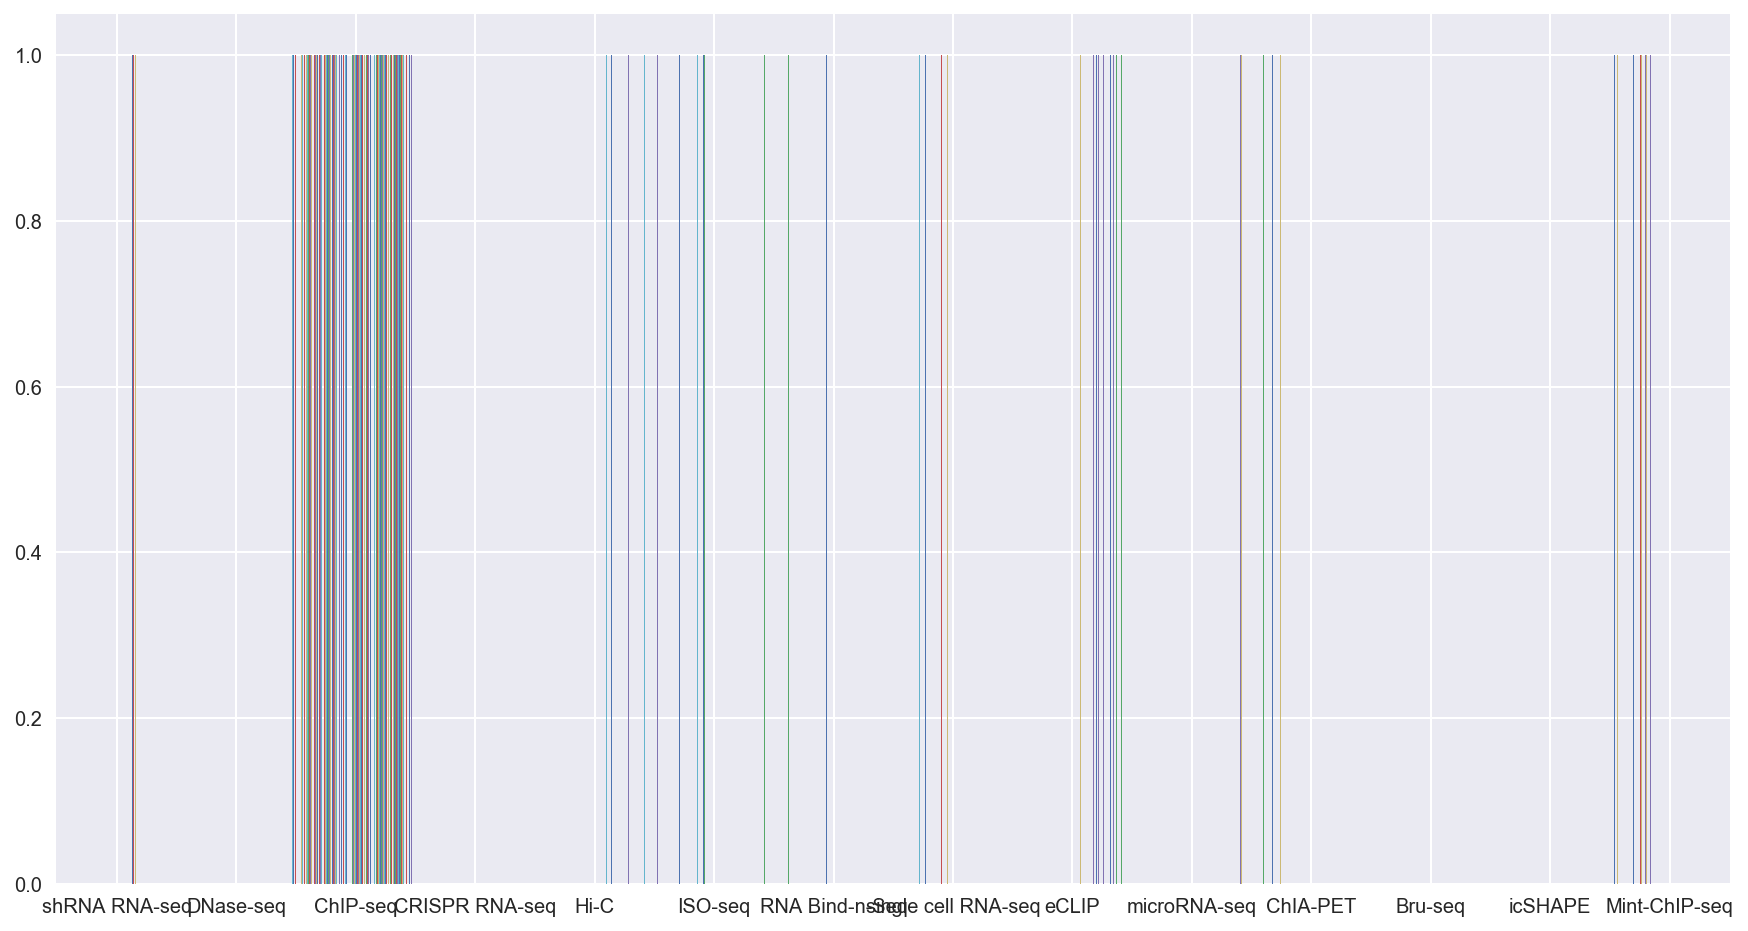

In [30]:
expts['Assay type'].hist(figsize=(15,8))

In [32]:
(
    expts.groupby(['Assay type', 'Date released'])
        .count()
        .unstack('Assay type')['Accession'][cols]
        .resample('M').sum()
        .cumsum()
        .plot.bar(stacked=True, figsize=(15,8), colormap='Spectral')
)

KeyError: "['shRNA RNA-seq' 'CRISPR RNA-seq' 'ISO-seq' 'RNA Bind-n-Seq' 'ChIA-PET'\n 'Bru-seq' 'icSHAPE' 'Mint-ChIP-seq'] not in index"

In [33]:
(
    expts.groupby(['Assay type', 'Date released'])
        .count()
        .unstack('Assay type')['Accession'][cols]
        .resample('M').sum()
        .cumsum()
        .plot.bar(stacked=True, figsize=(15,8), colormap='Spectral')
)

KeyError: "['shRNA RNA-seq' 'CRISPR RNA-seq' 'ISO-seq' 'RNA Bind-n-Seq' 'ChIA-PET'\n 'Bru-seq' 'icSHAPE' 'Mint-ChIP-seq'] not in index"

In [2]:
from pylab import *

def rstyle(ax): 
    """Styles an axes to appear like ggplot2
    Must be called after all plot and axis manipulation operations have been carried out (needs to know final tick spacing)
    """
    #set the style of the major and minor grid lines, filled blocks
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=1.4)
    ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
    ax.patch.set_facecolor('0.85')
    ax.set_axisbelow(True)
    
    #set minor tick spacing to 1/2 of the major ticks
    ax.xaxis.set_minor_locator(MultipleLocator( (plt.xticks()[0][1]-plt.xticks()[0][0]) / 2.0 ))
    ax.yaxis.set_minor_locator(MultipleLocator( (plt.yticks()[0][1]-plt.yticks()[0][0]) / 2.0 ))
    
    #remove axis border
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_alpha(0)
       
    #restyle the tick lines
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(5)
        line.set_color("gray")
        line.set_markeredgewidth(1.4)
    
    #remove the minor tick lines    
    for line in ax.xaxis.get_ticklines(minor=True) + ax.yaxis.get_ticklines(minor=True):
        line.set_markersize(0)
    
    #only show bottom left ticks, pointing out of axis
    rcParams['xtick.direction'] = 'out'
    rcParams['ytick.direction'] = 'out'
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    
    if ax.legend_ is None:
        lg = ax.legend_
        lg.get_frame().set_linewidth(0)
        lg.get_frame().set_alpha(0.5)


In [11]:
top_three = expts['Assay title'].value_counts().keys()[:3]


In [12]:
expts = pd.read_excel('/Users/hitz/encode-prod/experiment_report_2018_hacked.xls')

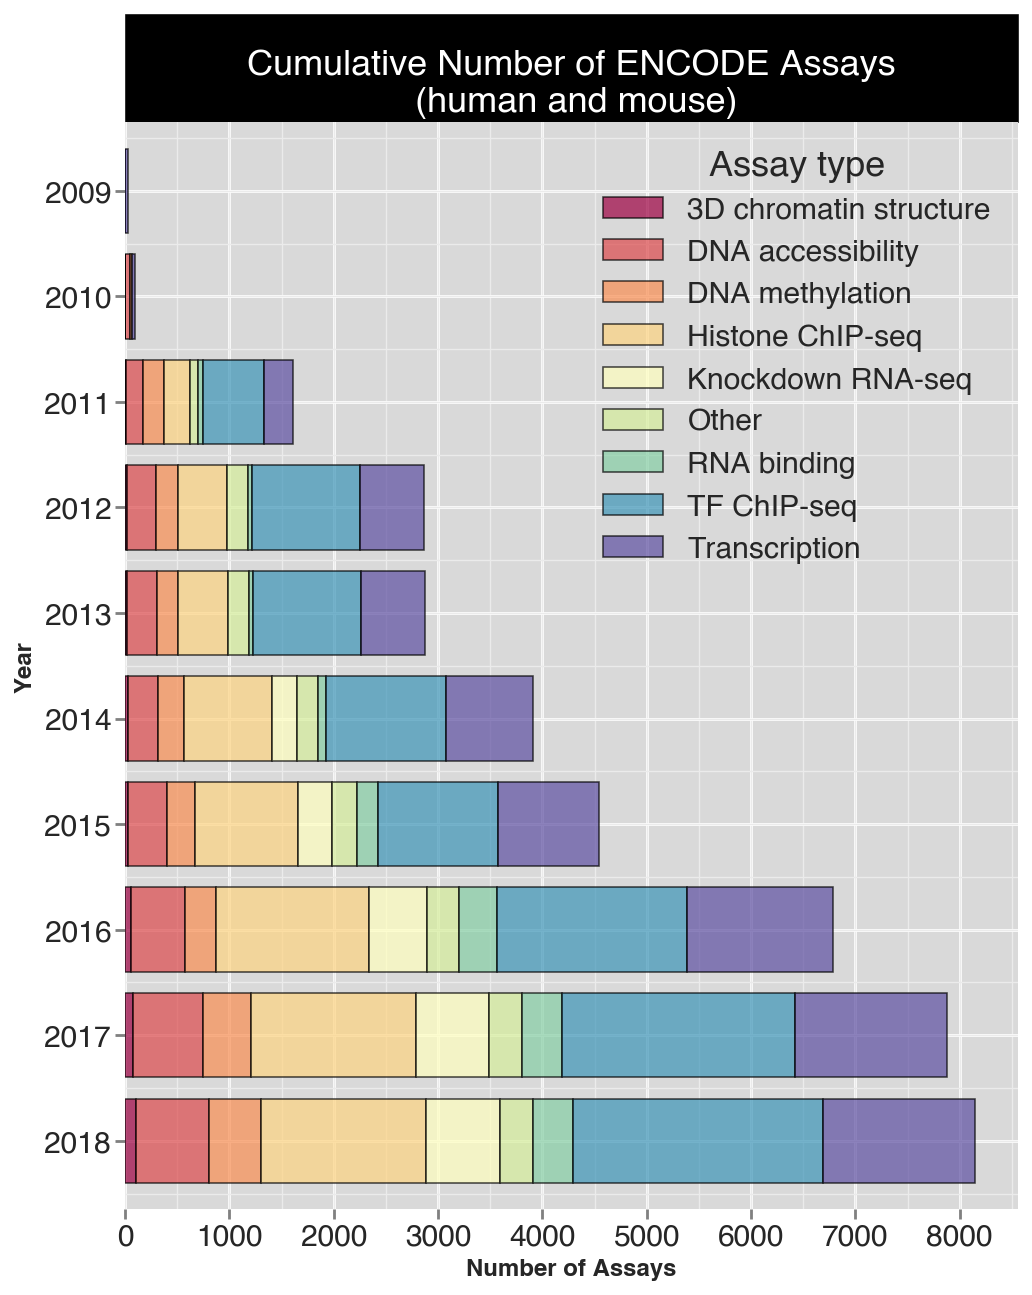

In [13]:
sns.set(font='Helvetica')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1.png',bbox_inches='tight')

NameError: name 'rstyle' is not defined

/Users/hitz/pyvenvs/jupyter/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Quicksand'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


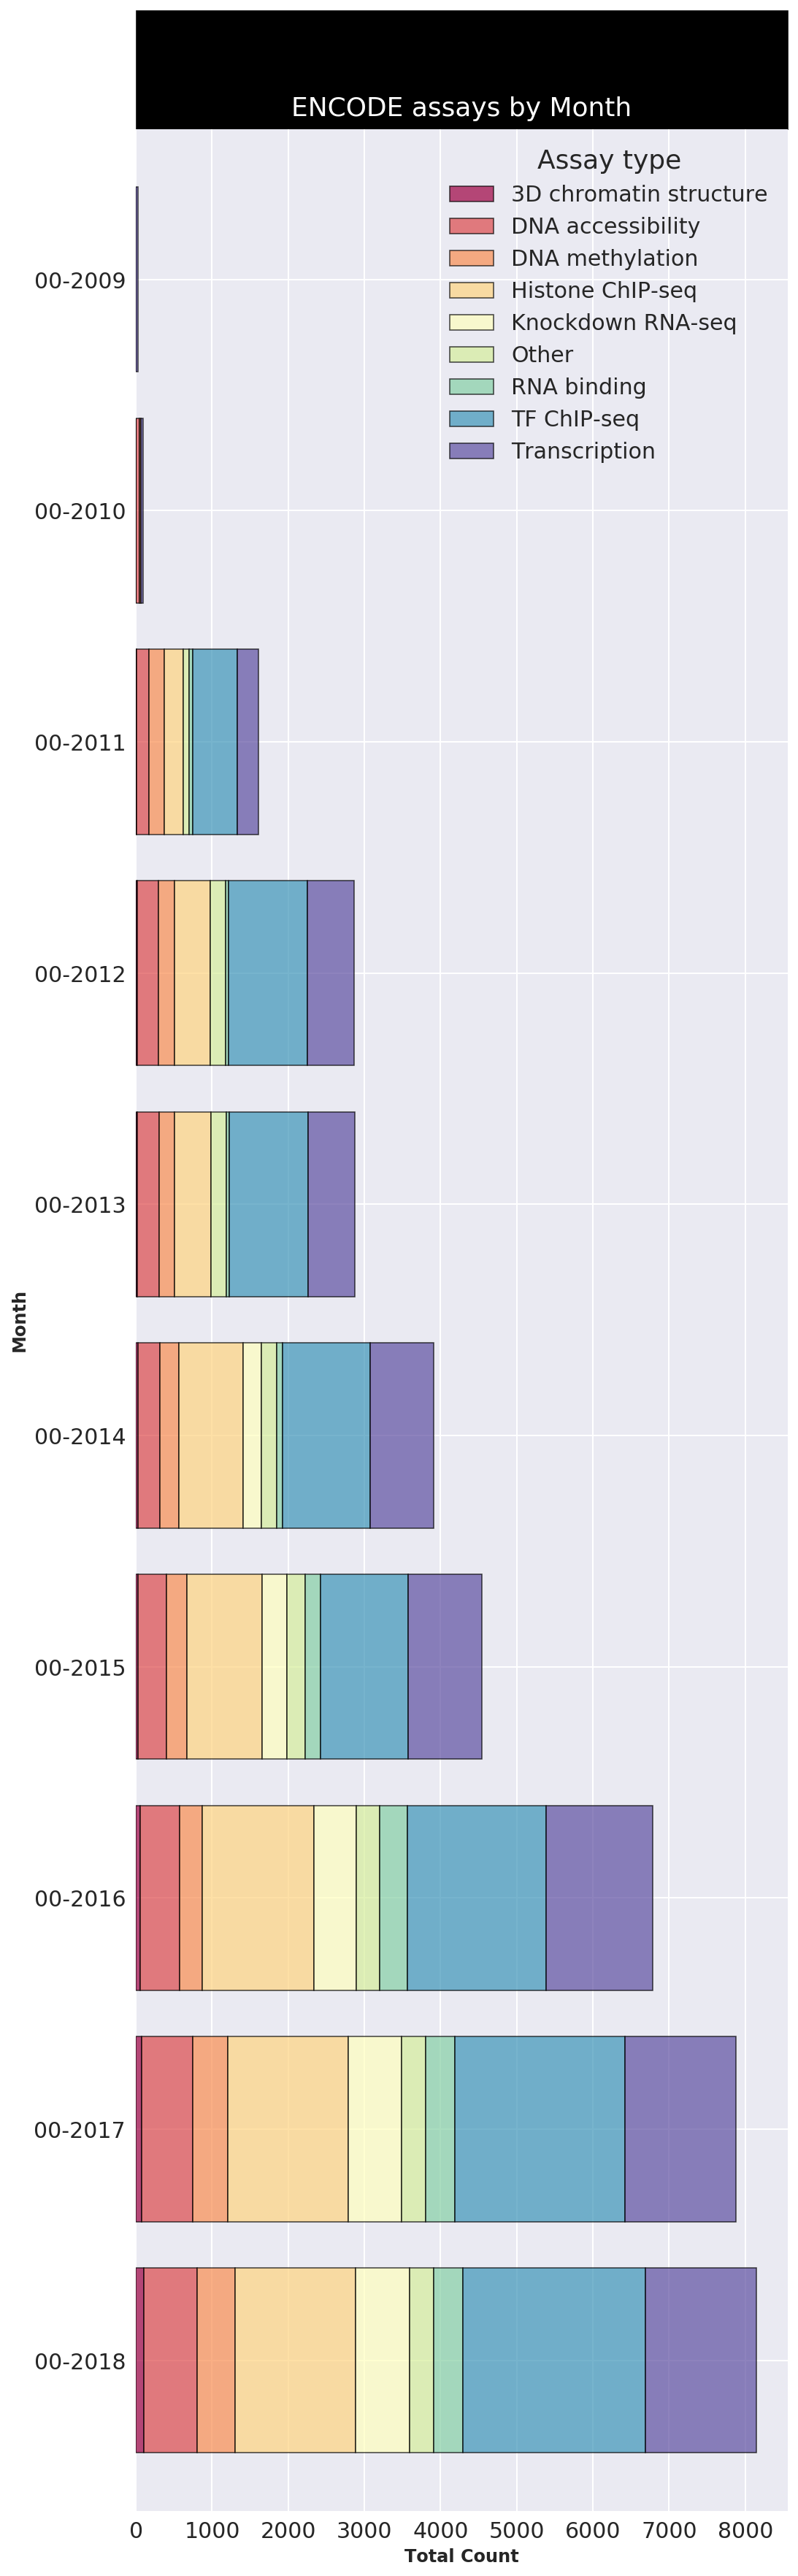

In [5]:
sns.set(font='Quicksand')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%M-%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 30))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.05,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'ENCODE assays by Year',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Quicksand',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Month', weight='bold', size=12, family='Quicksand')
    ax.set_xlabel('Total Count', weight='bold', size=12, family='Quicksand')
    rstyle(ax)

In [12]:
expts['Date released'] = expts['Date released'].apply(lambda x: pd.to_datetime(x) - pd.DateOffset(years=1))


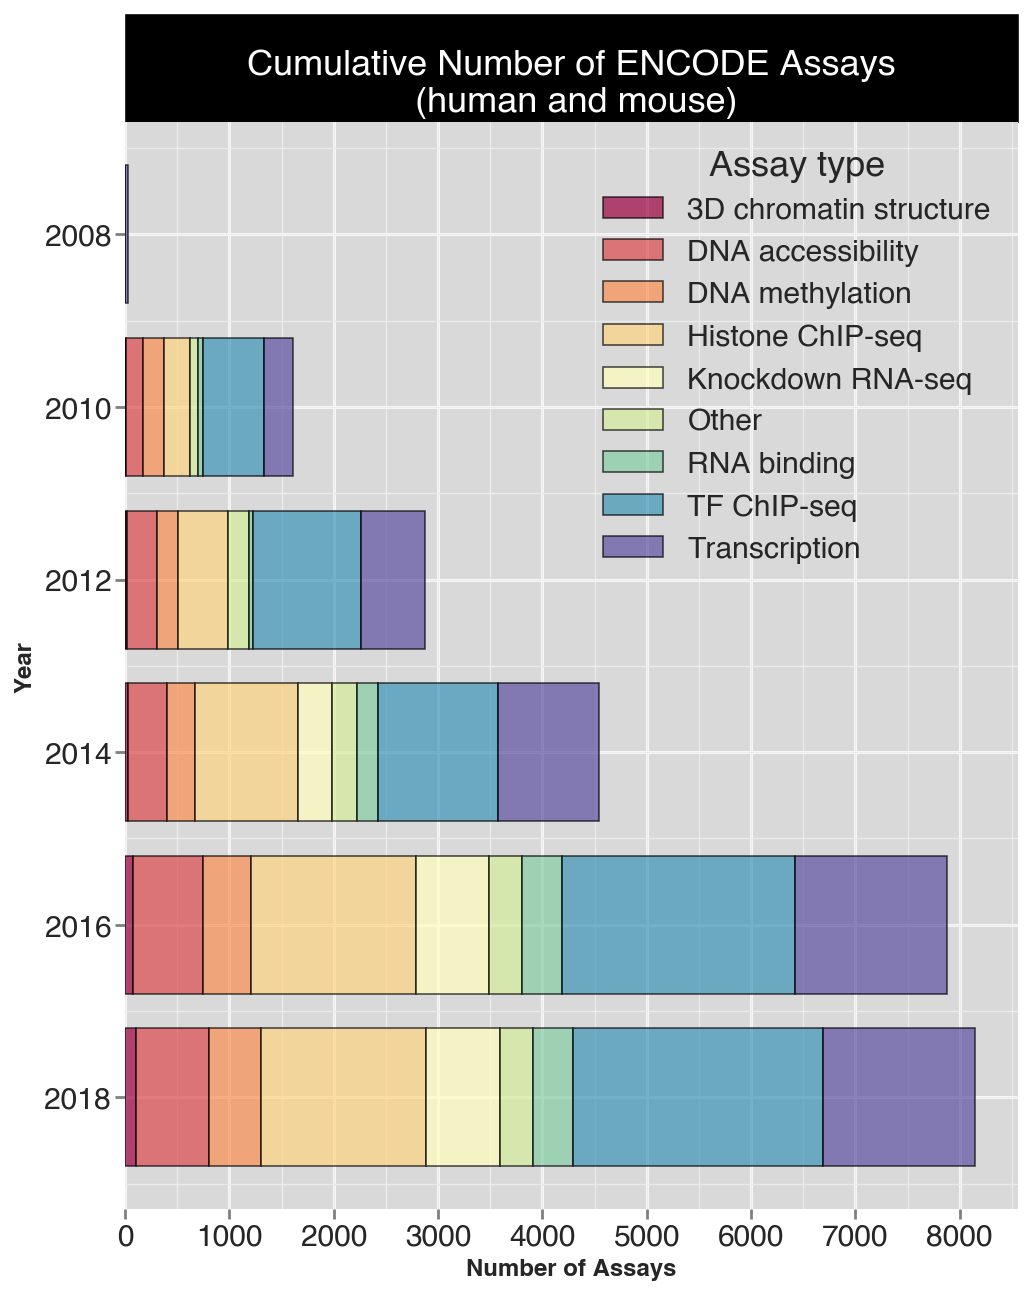

In [13]:
sns.set(font='Helvetica')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('2A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1-take2.png',bbox_inches='tight')

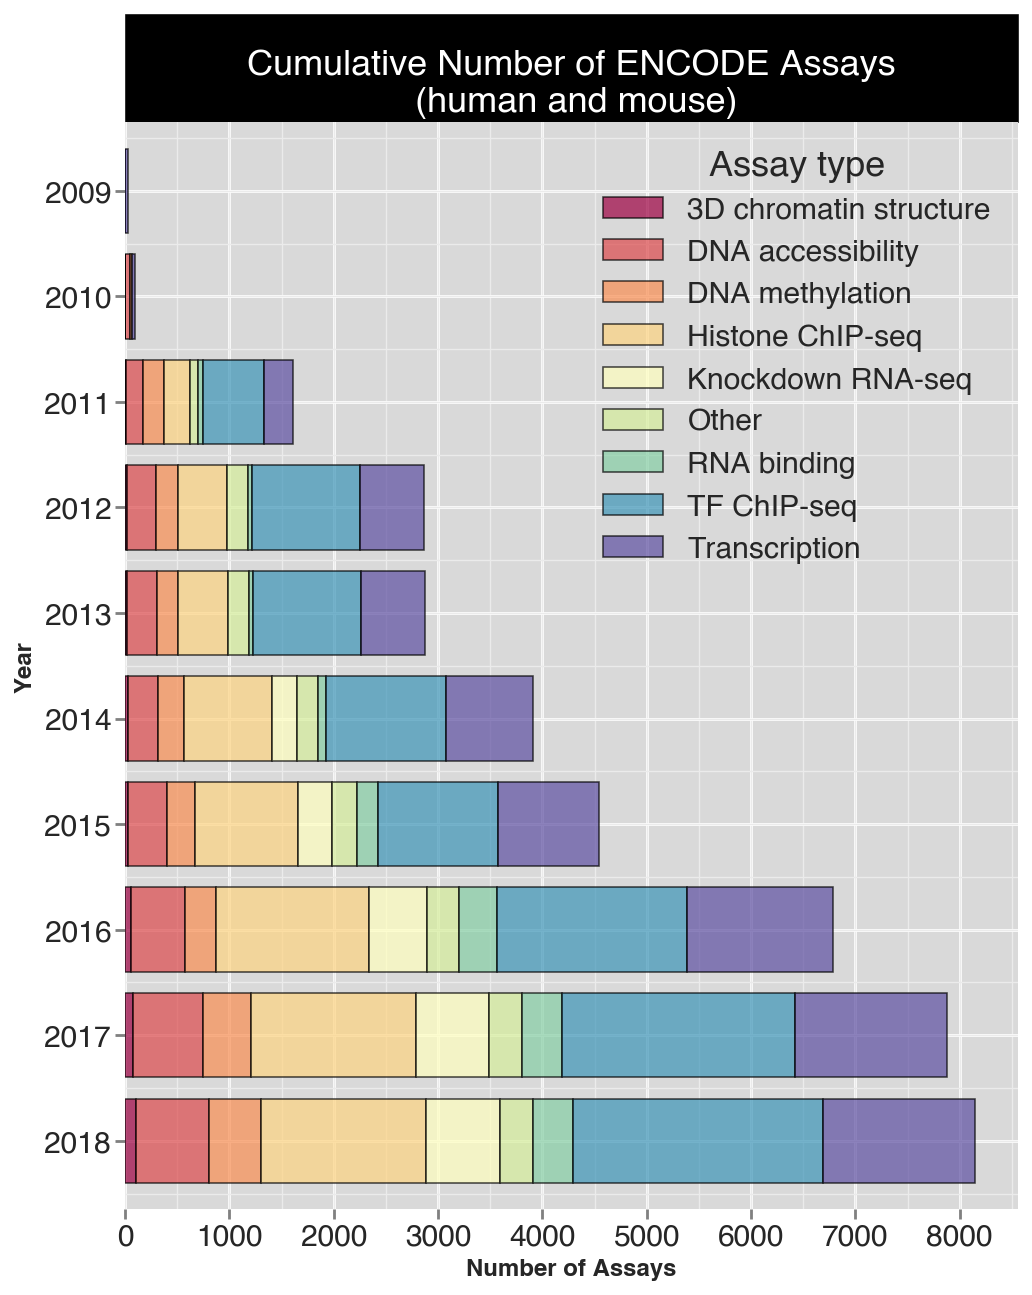

In [15]:
sns.set(font='Helvetica')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('A2').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))

ddf = df.drop(index=datetime.datetime.strptime('2017-12-31','%Y-%m-%d'))
y_labels = [x.strftime('%Y') for x in ddf.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        ddf.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1-take3.png',bbox_inches='tight')

In [3]:
expts = pd.read_excel('/Users/hitz/encode-prod/experiment_report_2019_incEC4_hacked.xls')
[ (expts['Assay type'].unique(), expts[
    'order'].unique()) ]

[(array(['3D chromatin structure', 'DNA accessibility', 'Transcription',
         'Knockdown RNA-seq', 'Other', 'DNA methylation', 'RNA binding',
         'Histone ChIP-seq', 'TF ChIP-seq', 'ENCODE4'], dtype=object),
  array([0, 1, 5, 4, 8, 2, 3, 6, 7, 9]))]

In [15]:
expts['Date released'] = expts['Date released'].apply(lambda x: pd.to_datetime(x) - pd.DateOffset(years=1))

In [16]:
df = (expts.groupby(['order','Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('2A',level=1).sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False)
                 )
df

Assay type,3D chromatin structure,DNA accessibility,DNA methylation,ENCODE4,Histone ChIP-seq,Knockdown RNA-seq,Other,RNA binding,TF ChIP-seq,Transcription
Date released,,,,,,,,,,
2018-12-31,103.0,715.0,500.0,496.0,1583.0,704.0,320.0,380.0,2397.0,1461.0
2016-12-31,77.0,666.0,463.0,26.0,1582.0,701.0,319.0,376.0,2232.0,1461.0
2014-12-31,28.0,371.0,275.0,NaN,984.0,323.0,237.0,205.0,1146.0,975.0
2012-12-31,21.0,284.0,206.0,NaN,475.0,NaN,201.0,42.0,1033.0,613.0
2010-12-31,9.0,159.0,204.0,NaN,254.0,NaN,77.0,42.0,582.0,283.0
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0


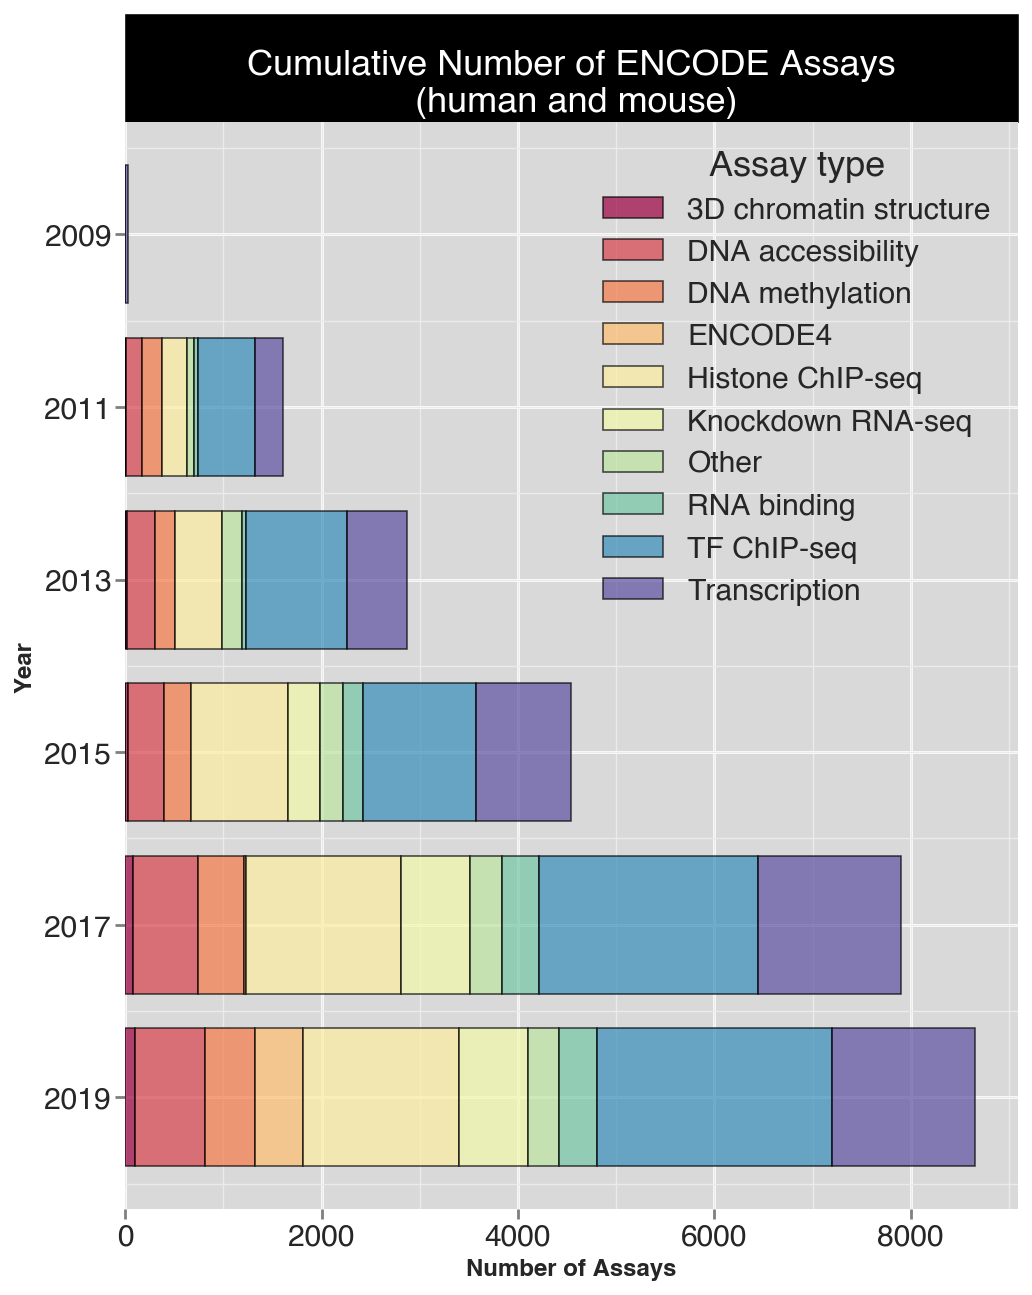

In [74]:
sns.set(font='Helvetica')
df = (expts.groupby(['order','Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('2A',level=1).sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False)
                 )
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True,
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1-with-encode4-a.png',bbox_inches='tight')

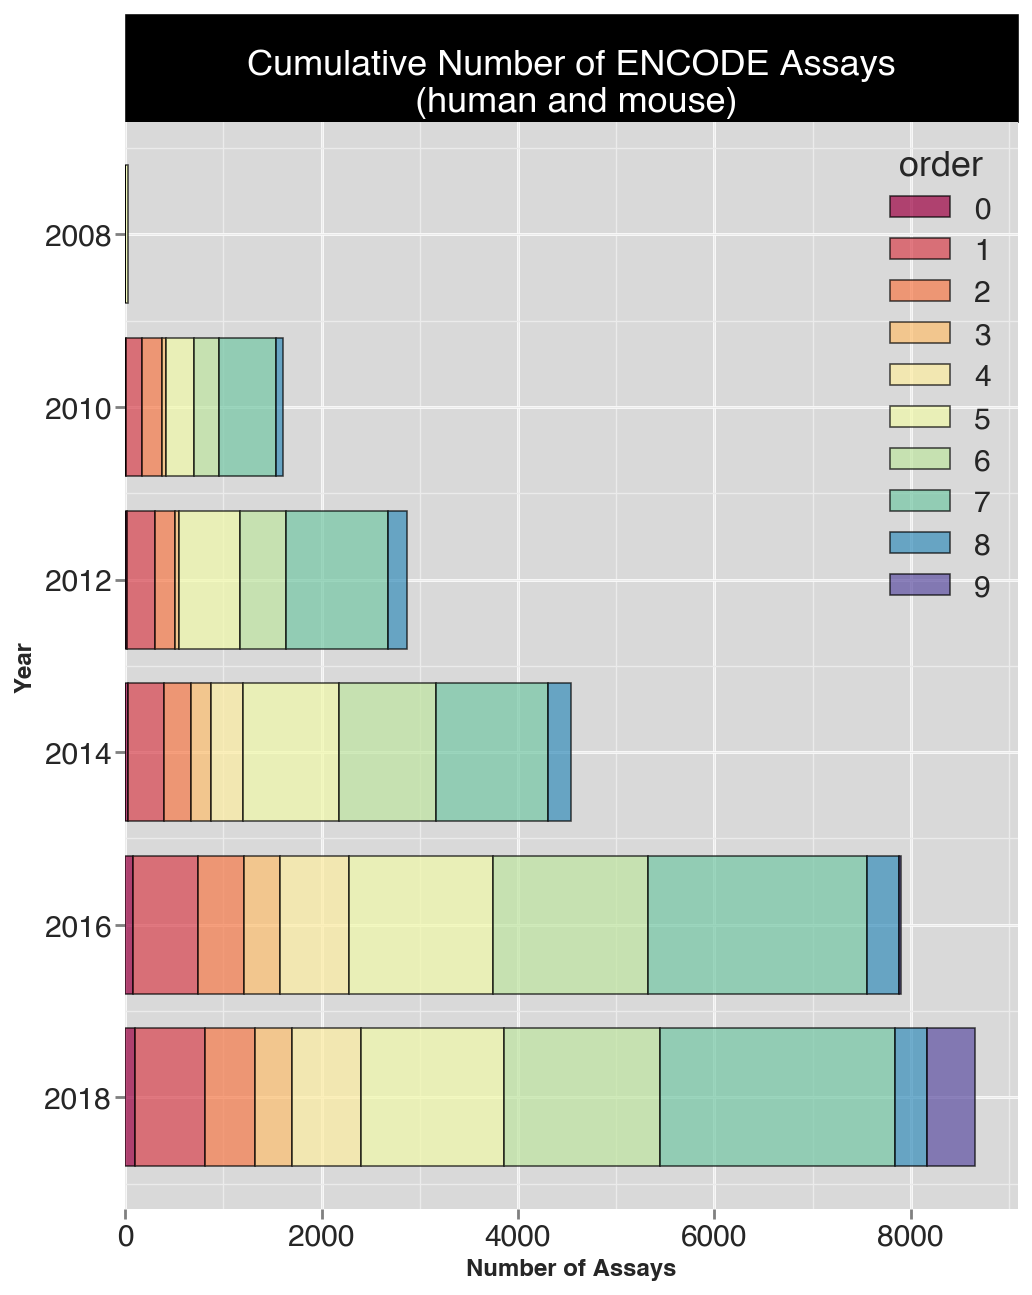

In [18]:
sns.set(font='Helvetica')
df = (expts.groupby(['order','Assay type', 'Date released'])
                .count()
                .unstack('order')['Accession']
                .resample('2A',level=1).sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False)
                 )
#ddf = df.drop(index=datetime.datetime.strptime('2017-12-31','%Y-%m-%d'))
ddf = df
y_labels = [x.strftime('%Y') for x in ddf.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        ddf.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True,
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1-with-encode4-b.png',bbox_inches='tight')

In [29]:
e4 = pd.read_excel('/Users/hitz/encode-prod/experiment_report_ENCODE4_12062019.xls')

In [32]:
e4g = (e4.groupby(['Assay type', 'Assay title', 'Status']).count())
e4g

ID  Accession  \
Assay type             Assay title        Status                        
3D chromatin structure ChIA-PET           in progress   23         23   
                                          submitted     21         21   
                       Hi-C               in progress   12         12   
                                          released      22         22   
                                          submitted      6          6   
DNA accessibility      ATAC-seq           in progress    9          9   
                                          submitted    124        124   
                       DNase-seq          in progress    3          3   
                                          released      49         49   
                                          submitted    147        147   
DNA binding            Control ChIP-seq   in progress   45         45   
                                          released      51         51   
                                          submitted    180        180   
                       Histone ChIP-seq   released     273        273   
                                          submitted      8          8   
                       Mint-ChIP-seq      submitted    155        155   
                       TF ChIP-seq        in progress  167        167   
                                          released      51         51   
                                          submitted    390        390   
RNA binding            Control eCLIP      released      55         55   
                       RNA Bind-n-Seq     submitted     18         18   
                       eCLIP              released      55         55   
RNA structure          icSHAPE            released       6          6   
Transcription          CRISPR RNA-seq     submitted     47         47   
                       long read RNA-seq  in progress    3          3   
                                          released       9          9   
                                          submitted     11         11   
                       microRNA-seq       released       3          3   
                                          submitted     18         18   
                       polyA plus RNA-seq submitted      2          2   
                       scRNA-seq          released      28         28   
                       shRNA RNA-seq      submitted     30         30   
                       total RNA-seq      in progress    1          1   

                                                       Assay name  \
Assay type             Assay title        Status                    
3D chromatin structure ChIA-PET           in progress          23   
                                          submitted            21   
                       Hi-C               in progress          12   
                                          released             22   
                                          submitted             6   
DNA accessibility      ATAC-seq           in progress           9   
                                          submitted           124   
                       DNase-seq          in progress           3   
                                          released             49   
                                          submitted           147   
DNA binding            Control ChIP-seq   in progress          45   
                                          released             51   
                                          submitted           180   
                       Histone ChIP-seq   released            273   
                                          submitted             8   
                       Mint-ChIP-seq      submitted           155   
                       TF ChIP-seq        in progress         167   
                                          released             51   
                                          submitted           390   
RNA binding            Control eCLIP      released 

In [35]:
e4g.to_csv('/Users/hitz/encode-prod/encode4_12_2019_pivot.csv')

In [ ]:
dd = data['Accession']

In [ ]:
dd